In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import pathlib
from util import runGridSearchClassifiers

## Data loading

In [2]:
## Vidéo
df_video_best_diapo_prediction = pd.read_csv('video_best_diapo.csv')
df_video_best_diapo_prediction = df_video_best_diapo_prediction.iloc[:,1:]
df_video_best_diapo_prediction['ypredict'] = df_video_best_diapo_prediction['ypredict'].astype(int)
df_video_best_diapo_prediction.columns = ['video_name', 'diapo','video_diapo_stress_prediction']
#df_video_best_diapo_prediction

In [3]:
df_video_best_global_prediction = pd.read_csv('video_best_global.csv')
df_video_best_global_prediction = df_video_best_global_prediction.iloc[:,1:]
df_video_best_global_prediction['y_predict_tw5_diapo_minmax_global'] = df_video_best_global_prediction['y_predict_tw5_diapo_minmax_global'].astype(int)
df_video_best_global_prediction.columns = ['video_name', 'video_global_stress_prediction']
#df_video_best_global_prediction

In [47]:
## Audio
# All
df_audio_best_diapo_prediction = pd.read_csv('audio_best_diapo.csv')
# Audio only
#df_audio_best_diapo_prediction = pd.read_csv('audio_only_best_diapo.csv')
df_audio_best_diapo_prediction = df_audio_best_diapo_prediction.iloc[:,1:]
df_audio_best_diapo_prediction['ypredict'] = df_audio_best_diapo_prediction['ypredict'].astype(int)
df_audio_best_diapo_prediction.columns = ['video_name', 'diapo','audio_diapo_stress_prediction']
#df_audio_best_diapo_prediction

# Audio only
df_audio_only_best_diapo_prediction = pd.read_csv('audio_only_best_diapo.csv')
df_audio_only_best_diapo_prediction = df_audio_only_best_diapo_prediction.iloc[:,1:]
df_audio_only_best_diapo_prediction['ypredict'] = df_audio_only_best_diapo_prediction['ypredict'].astype(int)
df_audio_only_best_diapo_prediction.columns = ['video_name', 'diapo','audio_diapo_stress_prediction']
#df_audio_only_best_diapo_prediction


In [48]:
# All
df_audio_best_global_prediction = pd.read_csv('audio_best_global.csv')
# Audio only
#df_audio_best_global_prediction = pd.read_csv('audio_only_best_global.csv')
df_audio_best_global_prediction = df_audio_best_global_prediction.iloc[:,1:]
df_audio_best_global_prediction['ypredict'] = df_audio_best_global_prediction['ypredict'].astype(int)
df_audio_best_global_prediction.columns = ['video_name', 'audio_global_stress_prediction']

# Audio only
df_audio_only_best_global_prediction = pd.read_csv('audio_only_best_global.csv')
df_audio_only_best_global_prediction = df_audio_only_best_global_prediction.iloc[:,1:]
df_audio_only_best_global_prediction['ypredict'] = df_audio_only_best_global_prediction['ypredict'].astype(int)
df_audio_only_best_global_prediction.columns = ['video_name', 'audio_global_stress_prediction']

In [30]:
## Text
df_text_best_diapo_prediction = pd.read_csv('text_best_diapo.csv')
df_text_best_diapo_prediction = df_text_best_diapo_prediction.iloc[:,1:]
df_text_best_diapo_prediction['ypredict'] = df_text_best_diapo_prediction['ypredict'].astype(int)
df_text_best_diapo_prediction.columns = ['video_name', 'diapo','text_diapo_stress_prediction']
#df_text_best_diapo_prediction

In [31]:
df_text_best_global_prediction = pd.read_csv('text_best_global.csv')
df_text_best_global_prediction = df_text_best_global_prediction.iloc[:,1:]
df_text_best_global_prediction['ypredict'] = df_text_best_global_prediction['ypredict'].astype(int)
df_text_best_global_prediction.columns = ['video_name', 'text_global_stress_prediction']
#df_text_best_global_prediction

In [8]:
## Anotations
df_annotations_stress = pd.read_csv('annotations.csv')
df_annotations_stress_global = df_annotations_stress[['video_name','stress_global']].set_index('video_name')
df_annotations_stress_global.stress_global = df_annotations_stress_global.stress_global.astype(int)
df_annotations_stress_global 

,stress_global
video_name,
Test_pour_AFPA,1
Video_1,0
WIN_20210323_19_17_40_Pro,1
WIN_20210329_10_16_02_Pro,1
WIN_20210330_13_10_29_Pro,0
WIN_20210331_21_22_52_Pro,1
WIN_20210402_14_27_50_Pro,1
WIN_20210402_19_04_53_Pro,2
WIN_20210403_18_49_15_Pro,2


In [9]:
df_annotations_stress_diapo = df_annotations_stress.iloc[:,:-1].set_index('video_name').stack()
df_annotations_stress_diapo = pd.DataFrame(df_annotations_stress_diapo).reset_index()
df_annotations_stress_diapo.columns = ['video_name','diapo','stress']
df_annotations_stress_diapo.stress = df_annotations_stress_diapo.stress.astype(int)
df_annotations_stress_diapo.diapo = df_annotations_stress_diapo.diapo.astype(int)
#df_annotations_stress_diapo = df_annotations_stress_diapo.set_index(['video_name','diapo'])
df_annotations_stress_diapo

,video_name,diapo,stress
0,Test_pour_AFPA,1,1
1,Test_pour_AFPA,8,1
2,Test_pour_AFPA,9,0
3,Test_pour_AFPA,10,0
4,Test_pour_AFPA,11,0
...,...,...,...
235,WIN_20210417_14_53_12_Pro,10,0
236,WIN_20210417_14_53_12_Pro,11,0
237,WIN_20210417_14_53_12_Pro,12,0
238,WIN_20210417_14_53_12_Pro,17,1


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA()

models_list = [
                LogisticRegression(multi_class='multinomial', fit_intercept=True, random_state=42),
                Pipeline(steps=[('pca', pca), ('logistic', LogisticRegression(multi_class='multinomial', fit_intercept=True))]),
                KNeighborsClassifier(),
                Pipeline(steps=[('pca', pca), ('knn', KNeighborsClassifier())]),
                RandomForestClassifier(random_state = 42, n_jobs=-1)
                ]

parameters_list = [
                    {'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4 , 5, 10], 'class_weight' : [None, 'balanced']},
                    {'pca__n_components': [1, 2, 3, 4],
                        'logistic__C': [0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4 , 5, 10], 'logistic__class_weight' : [None, 'balanced']},
                    {'n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12,  15, 20], 'weights' : ['uniform', 'distance'], 'p': [1, 2]},
                    {'pca__n_components': [1, 2, 3, 4],
                        'knn__n_neighbors': [4, 5, 6, 7, 8, 9, 10, 11, 12,  15, 20], 'knn__weights' : ['uniform', 'distance'],                              'knn__p': [1, 2]},
                    {'n_estimators': [50, 100, 150, 200], 'max_depth':[3, 4, 5, 6, 10, 15, 20], 'class_weight':[None,'balanced']}
                    ]

## Data preprocessing stress diapo

### Vidéo et audio

In [10]:
## we remove 2 interviews from the audio predictions
df_best_diapo_prediction = df_video_best_diapo_prediction.merge(df_audio_best_diapo_prediction, 
                                how='inner', on=['video_name','diapo']) 
# Audio only
#df_best_diapo_prediction = df_video_best_diapo_prediction.merge(df_audio_best_diapo_prediction, 
#                                how='left', on=['video_name','diapo']) 
#df_best_diapo_prediction = df_best_diapo_prediction.set_index(['video_name','diapo'])
df_best_diapo_prediction

,video_name,diapo,video_diapo_stress_prediction,audio_diapo_stress_prediction
0,Test_pour_AFPA,1,0,0
1,Test_pour_AFPA,8,1,0
2,Test_pour_AFPA,9,1,0
3,Test_pour_AFPA,10,0,0
4,Test_pour_AFPA,11,1,0
...,...,...,...,...
227,WIN_20210417_14_53_12_Pro,10,0,0
228,WIN_20210417_14_53_12_Pro,11,0,0
229,WIN_20210417_14_53_12_Pro,12,0,0
230,WIN_20210417_14_53_12_Pro,17,0,0


In [11]:
df_best_diapo_prediction = df_best_diapo_prediction.merge(df_annotations_stress_diapo, on=['video_name','diapo'])
X = df_best_diapo_prediction.iloc[:,:-1].set_index(['video_name','diapo'])
y = df_best_diapo_prediction.iloc[:,-1]

In [12]:
groups = X.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X, y, groups)

In [13]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                                      output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=0.1, multi_class='multinomial', random_state=42)
Best results 0.46680215807197084
Best params {'C': 0.1, 'class_weight': None}
accuracy (mean, std) 0.5001850138760406 0.09955379883801681
f1 (mean, std) 0.46680215807197084 0.09616123426150391
balanced accuracy (mean, std) 0.3521789321789322 0.06077296813653434
precision (mean, std) 0.4499169533366561 0.09407364272479181
recall (mean, std) 0.5001850138760406 0.09955379883801681

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      

In [14]:
best_result

{'best_estimator': Pipeline(steps=[('pca', PCA(n_components=2)),
                 ('knn',
                  KNeighborsClassifier(n_neighbors=20, p=1,
                                       weights='distance'))]),
 'best_score': 0.5262059319605026,
 'best_params': {'knn__n_neighbors': 20,
  'knn__p': 1,
  'knn__weights': 'distance',
  'pca__n_components': 2},
 'mean_test_f1_score': 0.5262059319605026,
 'std_test_f1_score': 0.06991960642620056,
 'mean_test_accuracy_score': 0.5470860314523589,
 'std_test_accuracy_score': 0.05887643296052362,
 'mean_test_balanced_accuracy_score': 0.4387445887445887,
 'std_test_balanced_accuracy_score': 0.10245935188142702,
 'mean_test_precision': 0.5523732309135843,
 'std_test_precision': 0.0663304206045799,
 'mean_test_recall': 0.5470860314523589,
 'std_test_recall': 0.05887643296052362}

### Vidéo, audio et texte

In [15]:
## we remove 2 interviews from the audio predictions
df_best_diapo_prediction = df_video_best_diapo_prediction.merge(df_audio_best_diapo_prediction, 
                                how='inner', on=['video_name','diapo']) 
#df_best_diapo_prediction

,video_name,diapo,video_diapo_stress_prediction,audio_diapo_stress_prediction
0,Test_pour_AFPA,1,0,0
1,Test_pour_AFPA,8,1,0
2,Test_pour_AFPA,9,1,0
3,Test_pour_AFPA,10,0,0
4,Test_pour_AFPA,11,1,0
...,...,...,...,...
227,WIN_20210417_14_53_12_Pro,10,0,0
228,WIN_20210417_14_53_12_Pro,11,0,0
229,WIN_20210417_14_53_12_Pro,12,0,0
230,WIN_20210417_14_53_12_Pro,17,0,0


In [16]:
def fillNaWithMax(row):
    if pd.isna(row.text_diapo_stress_prediction):
        return row.max_stress_predict
    else:
        return row.text_diapo_stress_prediction

# text
df_best_diapo_prediction = df_best_diapo_prediction.merge(df_text_best_diapo_prediction, 
                                how='left', on=['video_name','diapo']) 
df_best_diapo_prediction['max_stress_predict'] = df_best_diapo_prediction[['video_diapo_stress_prediction',             'audio_diapo_stress_prediction']].max(axis=1)
df_best_diapo_prediction['text_diapo_stress_prediction'] = df_best_diapo_prediction.apply(lambda row: fillNaWithMax(row), axis=1)
df_best_diapo_prediction['text_diapo_stress_prediction'] = df_best_diapo_prediction['text_diapo_stress_prediction'].astype(int)
df_best_diapo_prediction = df_best_diapo_prediction.drop('max_stress_predict',axis=1)
df_best_diapo_prediction

,video_name,diapo,video_diapo_stress_prediction,audio_diapo_stress_prediction,text_diapo_stress_prediction
0,Test_pour_AFPA,1,0,0,0
1,Test_pour_AFPA,8,1,0,1
2,Test_pour_AFPA,9,1,0,1
3,Test_pour_AFPA,10,0,0,0
4,Test_pour_AFPA,11,1,0,0
...,...,...,...,...,...
227,WIN_20210417_14_53_12_Pro,10,0,0,0
228,WIN_20210417_14_53_12_Pro,11,0,0,0
229,WIN_20210417_14_53_12_Pro,12,0,0,0
230,WIN_20210417_14_53_12_Pro,17,0,0,0


In [18]:
groups = X.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X, y, groups)

best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                                      output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=0.1, multi_class='multinomial', random_state=42)
Best results 0.46680215807197084
Best params {'C': 0.1, 'class_weight': None}
accuracy (mean, std) 0.5001850138760406 0.09955379883801681
f1 (mean, std) 0.46680215807197084 0.09616123426150391
balanced accuracy (mean, std) 0.3521789321789322 0.06077296813653434
precision (mean, std) 0.4499169533366561 0.09407364272479181
recall (mean, std) 0.5001850138760406 0.09955379883801681

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.2s 

In [19]:
best_result

{'best_estimator': Pipeline(steps=[('pca', PCA(n_components=2)),
                 ('knn',
                  KNeighborsClassifier(n_neighbors=20, p=1,
                                       weights='distance'))]),
 'best_score': 0.5262059319605026,
 'best_params': {'knn__n_neighbors': 20,
  'knn__p': 1,
  'knn__weights': 'distance',
  'pca__n_components': 2},
 'mean_test_f1_score': 0.5262059319605026,
 'std_test_f1_score': 0.06991960642620056,
 'mean_test_accuracy_score': 0.5470860314523589,
 'std_test_accuracy_score': 0.05887643296052362,
 'mean_test_balanced_accuracy_score': 0.4387445887445887,
 'std_test_balanced_accuracy_score': 0.10245935188142702,
 'mean_test_precision': 0.5523732309135843,
 'std_test_precision': 0.0663304206045799,
 'mean_test_recall': 0.5470860314523589,
 'std_test_recall': 0.05887643296052362}

#### Autre preprocessing

In [41]:
df_best_diapo_prediction = df_video_best_diapo_prediction.merge(df_audio_best_diapo_prediction, 
                                how='inner', on=['video_name','diapo']) 
df_best_diapo_prediction = df_best_diapo_prediction.merge(df_text_best_diapo_prediction, 
                                how='left', on=['video_name','diapo']) 

In [42]:
def countStress(row):
    counter = {'0':0, '1':0, '2':0, '3':0}
    nb_stress = 0
    if not pd.isna(row.video_diapo_stress_prediction):
        counter[str(row.video_diapo_stress_prediction)] += 1
        nb_stress += 1
    if not pd.isna(row.audio_diapo_stress_prediction):
        counter[str(row.audio_diapo_stress_prediction)] += 1
        nb_stress += 1
    if not pd.isna(row.text_diapo_stress_prediction):
        counter[str(int(row.text_diapo_stress_prediction))] += 1
        nb_stress += 1
    
    results = [0, 0, 0, 0]
    for stress, count in counter.items():
        results[int(stress)] = count/nb_stress

    return results
      

df_best_diapo_prediction[['0','1','2','3']] = df_best_diapo_prediction.apply(lambda row : countStress(row),axis=1, result_type='expand')
df_best_diapo_prediction = df_best_diapo_prediction.drop(['video_diapo_stress_prediction','audio_diapo_stress_prediction','text_diapo_stress_prediction'],axis=1)
df_best_diapo_prediction

,video_name,diapo,0,1,2,3
0,Test_pour_AFPA,1,1.000000,0.000000,0.0,0.0
1,Test_pour_AFPA,8,0.333333,0.666667,0.0,0.0
2,Test_pour_AFPA,9,0.333333,0.666667,0.0,0.0
3,Test_pour_AFPA,10,1.000000,0.000000,0.0,0.0
4,Test_pour_AFPA,11,0.666667,0.333333,0.0,0.0
...,...,...,...,...,...,...
227,WIN_20210417_14_53_12_Pro,10,1.000000,0.000000,0.0,0.0
228,WIN_20210417_14_53_12_Pro,11,1.000000,0.000000,0.0,0.0
229,WIN_20210417_14_53_12_Pro,12,1.000000,0.000000,0.0,0.0
230,WIN_20210417_14_53_12_Pro,17,1.000000,0.000000,0.0,0.0


In [43]:
df_best_diapo_prediction = df_best_diapo_prediction.merge(df_annotations_stress_diapo, on=['video_name','diapo'])
X = df_best_diapo_prediction.iloc[:,:-1].set_index(['video_name','diapo'])
y = df_best_diapo_prediction.iloc[:,-1]

In [44]:
groups = X.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X, y, groups)

best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                                      output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=2, multi_class='multinomial', random_state=42)
Best results 0.545497051854358
Best params {'C': 2, 'class_weight': None}
accuracy (mean, std) 0.5604995374653099 0.048524628748651266
f1 (mean, std) 0.545497051854358 0.051754781655823305
balanced accuracy (mean, std) 0.44604617604617597 0.09597526589283155
precision (mean, std) 0.5702968671754383 0.054642416786790445
recall (mean, std) 0.5604995374653099 0.048524628748651266

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.8s fin

In [45]:
best_result

{'best_estimator': LogisticRegression(C=2, multi_class='multinomial', random_state=42),
 'best_score': 0.545497051854358,
 'best_params': {'C': 2, 'class_weight': None},
 'mean_test_f1_score': 0.545497051854358,
 'std_test_f1_score': 0.051754781655823305,
 'mean_test_accuracy_score': 0.5604995374653099,
 'std_test_accuracy_score': 0.048524628748651266,
 'mean_test_balanced_accuracy_score': 0.44604617604617597,
 'std_test_balanced_accuracy_score': 0.09597526589283155,
 'mean_test_precision': 0.5702968671754383,
 'std_test_precision': 0.054642416786790445,
 'mean_test_recall': 0.5604995374653099,
 'std_test_recall': 0.048524628748651266}

## Vidéo + audio only

In [49]:
df_best_diapo_prediction = df_video_best_diapo_prediction.merge(df_audio_only_best_diapo_prediction, 
                                how='left', on=['video_name','diapo']) 
df_best_diapo_prediction

,video_name,diapo,video_diapo_stress_prediction,audio_diapo_stress_prediction
0,Test_pour_AFPA,1,0,NaN
1,Test_pour_AFPA,8,1,1.0
2,Test_pour_AFPA,9,1,1.0
3,Test_pour_AFPA,10,0,0.0
4,Test_pour_AFPA,11,1,1.0
...,...,...,...,...
227,WIN_20210417_14_53_12_Pro,10,0,0.0
228,WIN_20210417_14_53_12_Pro,11,0,0.0
229,WIN_20210417_14_53_12_Pro,12,0,NaN
230,WIN_20210417_14_53_12_Pro,17,0,1.0


In [51]:
def fillNaWithMaxAudio(row):
    if pd.isna(row.audio_diapo_stress_prediction):
        return row.video_diapo_stress_prediction
    else:
        return row.audio_diapo_stress_prediction

df_best_diapo_prediction['audio_diapo_stress_prediction'] = df_best_diapo_prediction.apply(lambda row: fillNaWithMaxAudio(row), axis=1)
df_best_diapo_prediction['audio_diapo_stress_prediction'] = df_best_diapo_prediction['audio_diapo_stress_prediction'].astype(int)
df_best_diapo_prediction

,video_name,diapo,video_diapo_stress_prediction,audio_diapo_stress_prediction
0,Test_pour_AFPA,1,0,0
1,Test_pour_AFPA,8,1,1
2,Test_pour_AFPA,9,1,1
3,Test_pour_AFPA,10,0,0
4,Test_pour_AFPA,11,1,1
...,...,...,...,...
227,WIN_20210417_14_53_12_Pro,10,0,0
228,WIN_20210417_14_53_12_Pro,11,0,0
229,WIN_20210417_14_53_12_Pro,12,0,0
230,WIN_20210417_14_53_12_Pro,17,0,1


In [52]:
df_best_diapo_prediction = df_best_diapo_prediction.merge(df_annotations_stress_diapo, on=['video_name','diapo'])
X = df_best_diapo_prediction.iloc[:,:-1].set_index(['video_name','diapo'])
y = df_best_diapo_prediction.iloc[:,-1]

In [53]:
groups = X.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X, y, groups)

best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list, 
                                                                output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=0.01, multi_class='multinomial', random_state=42)
Best results 0.512692735901698
Best params {'C': 0.01, 'class_weight': None}
accuracy (mean, std) 0.5469010175763183 0.06869884362651227
f1 (mean, std) 0.512692735901698 0.06383832053593287
balanced accuracy (mean, std) 0.3832756132756133 0.039289709831705995
precision (mean, std) 0.4915714460788466 0.06382330836387479
recall (mean, std) 0.5469010175763183 0.06869884362651227

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      |

In [54]:
best_result

{'best_estimator': LogisticRegression(C=0.01, multi_class='multinomial', random_state=42),
 'best_score': 0.512692735901698,
 'best_params': {'C': 0.01, 'class_weight': None},
 'mean_test_f1_score': 0.512692735901698,
 'std_test_f1_score': 0.06383832053593287,
 'mean_test_accuracy_score': 0.5469010175763183,
 'std_test_accuracy_score': 0.06869884362651227,
 'mean_test_balanced_accuracy_score': 0.3832756132756133,
 'std_test_balanced_accuracy_score': 0.039289709831705995,
 'mean_test_precision': 0.4915714460788466,
 'std_test_precision': 0.06382330836387479,
 'mean_test_recall': 0.5469010175763183,
 'std_test_recall': 0.06869884362651227}

## Stress global

### Vidéo + audio

In [56]:
df_best_global_prediction = df_video_best_global_prediction.merge(df_audio_best_global_prediction, 
                                how='inner', on=['video_name']) 
#df_best_global_prediction = df_best_global_prediction.merge(df_text_best_global_prediction, on=['video_name'])
#df_best_diapo_prediction = df_best_diapo_prediction.set_index(['video_name','diapo'])
df_best_global_prediction = df_best_global_prediction.merge(df_annotations_stress_global, on=['video_name'])
X = df_best_global_prediction.iloc[:,:-1].set_index(['video_name'])
y = df_best_global_prediction.iloc[:,-1]
#df_best_global_prediction

In [58]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                           output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=0.5, class_weight='balanced', multi_class='multinomial',
                   random_state=42)
Best results 0.654888888888889
Best params {'C': 0.5, 'class_weight': 'balanced'}
accuracy (mean, std) 0.6933333333333334 0.21746008573733455
f1 (mean, std) 0.654888888888889 0.23902435435601252
balanced accuracy (mean, std) 0.7333333333333333 0.22879178091082222
precision (mean, std) 0.6855555555555555 0.2770122785530198
recall (mean, std) 0.6933333333333334 0.21746008573733455

Fitting 5 folds for each of 80 candidates, totalling 400 fit

In [59]:
best_result

{'best_estimator': Pipeline(steps=[('pca', PCA(n_components=2)),
                 ('knn',
                  KNeighborsClassifier(n_neighbors=8, p=1, weights='distance'))]),
 'best_score': 0.77,
 'best_params': {'knn__n_neighbors': 8,
  'knn__p': 1,
  'knn__weights': 'distance',
  'pca__n_components': 2},
 'mean_test_f1_score': 0.77,
 'std_test_f1_score': 0.13257189989577473,
 'mean_test_accuracy_score': 0.7933333333333333,
 'std_test_accuracy_score': 0.1236482466066094,
 'mean_test_balanced_accuracy_score': 0.7888888888888889,
 'std_test_balanced_accuracy_score': 0.12372809695177829,
 'mean_test_precision': 0.8455555555555556,
 'std_test_precision': 0.09865765724632496,
 'mean_test_recall': 0.7933333333333333,
 'std_test_recall': 0.1236482466066094}

In [111]:
font = {'family' : 'normal',
    'weight' : 'bold',
    'size'   : 22}
plt.rc('font', **font)

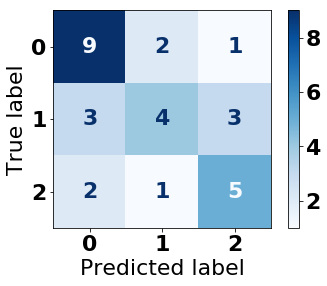

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y,y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1,2])
disp = disp.plot(include_values=[0,1,2], cmap=plt.cm.Blues)

### Vidéo + audio + texte

In [68]:
df_best_global_prediction = df_video_best_global_prediction.merge(df_audio_best_global_prediction, 
                                how='inner', on=['video_name']) 
df_best_global_prediction = df_best_global_prediction.merge(df_text_best_global_prediction, on=['video_name'])
df_best_global_prediction = df_best_global_prediction.merge(df_annotations_stress_global, on=['video_name'])
X = df_best_global_prediction.iloc[:,:-1].set_index(['video_name'])
y = df_best_global_prediction.iloc[:,-1]
#df_best_global_prediction

In [69]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                           output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=1, multi_class='multinomial', random_state=42)
Best results 0.6693333333333333
Best params {'C': 1, 'class_weight': None}
accuracy (mean, std) 0.6933333333333334 0.053333333333333365
f1 (mean, std) 0.6693333333333333 0.08254471291142533
balanced accuracy (mean, std) 0.7222222222222221 0.08606629658238704
precision (mean, std) 0.7188888888888889 0.12783090682906362
recall (mean, std) 0.6933333333333334 0.053333333333333365

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    1.3s fini

In [70]:
best_result

{'best_estimator': Pipeline(steps=[('pca', PCA(n_components=2)),
                 ('knn',
                  KNeighborsClassifier(n_neighbors=11, weights='distance'))]),
 'best_score': 0.7233333333333334,
 'best_params': {'knn__n_neighbors': 11,
  'knn__p': 2,
  'knn__weights': 'distance',
  'pca__n_components': 2},
 'mean_test_f1_score': 0.7233333333333334,
 'std_test_f1_score': 0.18955438321898777,
 'mean_test_accuracy_score': 0.76,
 'std_test_accuracy_score': 0.16786237749352229,
 'mean_test_balanced_accuracy_score': 0.7555555555555555,
 'std_test_balanced_accuracy_score': 0.16703662642636563,
 'mean_test_precision': 0.7566666666666666,
 'std_test_precision': 0.20859317129549357,
 'mean_test_recall': 0.76,
 'std_test_recall': 0.16786237749352229}

### Vidéo + texte

In [72]:
df_best_global_prediction = df_video_best_global_prediction.merge(df_text_best_global_prediction, 
                                how='inner', on=['video_name']) 
df_best_global_prediction = df_best_global_prediction.merge(df_annotations_stress_global, on=['video_name'])
X = df_best_global_prediction.iloc[:,:-1].set_index(['video_name'])
y = df_best_global_prediction.iloc[:,-1]
#df_best_global_prediction

In [73]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                           output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    0.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=0.5, class_weight='balanced', multi_class='multinomial',
                   random_state=42)
Best results 0.5452063492063493
Best params {'C': 0.5, 'class_weight': 'balanced'}
accuracy (mean, std) 0.5599999999999999 0.12000000000000002
f1 (mean, std) 0.5452063492063493 0.14300205701107188
balanced accuracy (mean, std) 0.5555555555555556 0.17213259316477408
precision (mean, std) 0.5844444444444444 0.17855386156978373
recall (mean, std) 0.5599999999999999 0.12000000000000002

Fitting 5 folds for each of 80 candidates, totalling 400 

In [74]:
best_result

{'best_estimator': RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=42),
 'best_score': 0.6296507936507936,
 'best_params': {'class_weight': None, 'max_depth': 4, 'n_estimators': 100},
 'mean_test_f1_score': 0.6296507936507936,
 'std_test_f1_score': 0.1746245989741807,
 'mean_test_accuracy_score': 0.6533333333333334,
 'std_test_accuracy_score': 0.1514375558880073,
 'mean_test_balanced_accuracy_score': 0.6555555555555556,
 'std_test_balanced_accuracy_score': 0.1699673171197595,
 'mean_test_precision': 0.6777777777777778,
 'std_test_precision': 0.1942379856303303,
 'mean_test_recall': 0.6533333333333334,
 'std_test_recall': 0.1514375558880073}

### Vidéo + audio only

In [76]:
df_best_global_prediction = df_video_best_global_prediction.merge(df_audio_only_best_global_prediction, 
                                how='inner', on=['video_name']) 
df_best_global_prediction = df_best_global_prediction.merge(df_annotations_stress_global, on=['video_name'])
X = df_best_global_prediction.iloc[:,:-1].set_index(['video_name'])
y = df_best_global_prediction.iloc[:,-1]
#df_best_global_prediction

In [77]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                           output_predict=True, n_jobs=-1, verbose=False)

f1_score (weighted) 0.6577939100625125
accuracy 0.6551724137931034


In [79]:
best_result

{'best_estimator': RandomForestClassifier(class_weight='balanced', max_depth=4, n_estimators=200,
                        n_jobs=-1, random_state=42),
 'best_score': 0.6315555555555556,
 'best_params': {'class_weight': 'balanced',
  'max_depth': 4,
  'n_estimators': 200},
 'mean_test_f1_score': 0.6315555555555556,
 'std_test_f1_score': 0.21580237873264208,
 'mean_test_accuracy_score': 0.6533333333333334,
 'std_test_accuracy_score': 0.184511366707974,
 'mean_test_balanced_accuracy_score': 0.6777777777777778,
 'std_test_balanced_accuracy_score': 0.13788526273323176,
 'mean_test_precision': 0.6705555555555556,
 'std_test_precision': 0.24894592600417076,
 'mean_test_recall': 0.6533333333333334,
 'std_test_recall': 0.184511366707974}

### Vidéo + audio only + texte

In [81]:
df_best_global_prediction = df_video_best_global_prediction.merge(df_audio_only_best_global_prediction, 
                                how='inner', on=['video_name']) 
df_best_global_prediction = df_best_global_prediction.merge(df_text_best_global_prediction, on=['video_name'])
df_best_global_prediction = df_best_global_prediction.merge(df_annotations_stress_global, on=['video_name'])
X = df_best_global_prediction.iloc[:,:-1].set_index(['video_name'])
y = df_best_global_prediction.iloc[:,-1]
#df_best_global_prediction

In [82]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list,                                           output_predict=True, n_jobs=-1, verbose=False)

f1_score (weighted) 0.5782019704433498
accuracy 0.5862068965517241


In [83]:
best_result

{'best_estimator': Pipeline(steps=[('pca', PCA(n_components=2)),
                 ('knn',
                  KNeighborsClassifier(n_neighbors=6, p=1, weights='distance'))]),
 'best_score': 0.5377777777777778,
 'best_params': {'knn__n_neighbors': 6,
  'knn__p': 1,
  'knn__weights': 'distance',
  'pca__n_components': 2},
 'mean_test_f1_score': 0.5377777777777778,
 'std_test_f1_score': 0.22950295191624792,
 'mean_test_accuracy_score': 0.5933333333333334,
 'std_test_accuracy_score': 0.19252705437591539,
 'mean_test_balanced_accuracy_score': 0.5888888888888888,
 'std_test_balanced_accuracy_score': 0.16703662642636563,
 'mean_test_precision': 0.5733333333333333,
 'std_test_precision': 0.2713114014250228,
 'mean_test_recall': 0.5933333333333334,
 'std_test_recall': 0.19252705437591539}

## Timeframe 5s

In [84]:
df_video_best_5s_prediction = pd.read_csv('video_best_5sec.csv')
df_video_best_5s_prediction = df_video_best_5s_prediction.iloc[:,1:]
df_video_best_5s_prediction['ypredict'] = df_video_best_5s_prediction['ypredict'].astype(int)
df_video_best_5s_prediction['frameTimeWindow'] = df_video_best_5s_prediction['frameTimeWindow'] * 5
df_video_best_5s_prediction.columns = ['video_name', 'diapo','frameTimeWindow', 'video_diapo_stress_prediction']
df_video_best_5s_prediction

,video_name,diapo,frameTimeWindow,video_diapo_stress_prediction
0,Test_pour_AFPA,9,220,0
1,Test_pour_AFPA,9,225,0
2,Test_pour_AFPA,9,230,0
3,Test_pour_AFPA,9,235,0
4,Test_pour_AFPA,9,240,0
...,...,...,...,...
5136,WIN_20210417_14_53_12_Pro,18,600,1
5137,WIN_20210417_14_53_12_Pro,18,605,1
5138,WIN_20210417_14_53_12_Pro,18,610,1
5139,WIN_20210417_14_53_12_Pro,18,615,1


In [85]:
df_audio_best_5s_prediction = pd.read_csv('audio_best_5sec.csv')
df_audio_best_5s_prediction = df_audio_best_5s_prediction.iloc[:,1:]
df_audio_best_5s_prediction['ypredict'] = df_audio_best_5s_prediction['ypredict'].astype(int)
df_audio_best_5s_prediction.columns = ['video_name', 'diapo','frameTimeWindow','audio_diapo_stress_prediction']
df_audio_best_5s_prediction

,video_name,diapo,frameTimeWindow,audio_diapo_stress_prediction
0,Test_pour_AFPA,1,0,1
1,Test_pour_AFPA,1,5,1
2,Test_pour_AFPA,1,10,1
3,Test_pour_AFPA,1,15,1
4,Test_pour_AFPA,1,20,1
...,...,...,...,...
5322,WIN_20210417_14_53_12_Pro,18,600,1
5323,WIN_20210417_14_53_12_Pro,18,605,1
5324,WIN_20210417_14_53_12_Pro,18,610,1
5325,WIN_20210417_14_53_12_Pro,18,615,1


### Stacking vertically

In [86]:
df_5s = df_video_best_5s_prediction.merge(df_audio_best_5s_prediction, how='inner', on=['video_name','diapo','frameTimeWindow'])
df_5s

,video_name,diapo,frameTimeWindow,video_diapo_stress_prediction,audio_diapo_stress_prediction
0,Test_pour_AFPA,9,220,0,1
1,Test_pour_AFPA,9,225,0,1
2,Test_pour_AFPA,9,230,0,1
3,Test_pour_AFPA,9,235,0,1
4,Test_pour_AFPA,9,240,0,0
...,...,...,...,...,...
5136,WIN_20210417_14_53_12_Pro,18,600,1,1
5137,WIN_20210417_14_53_12_Pro,18,605,1,1
5138,WIN_20210417_14_53_12_Pro,18,610,1,1
5139,WIN_20210417_14_53_12_Pro,18,615,1,1


In [87]:
from scipy.stats import kurtosis, skew

def percentil25(x): 
    return np.percentile(x, q=25)

def percentil75(x): 
    return np.percentile(x, q=75)

In [88]:
df_5s = df_5s.groupby(['video_name']).agg({
    'audio_diapo_stress_prediction': ['mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew],
    'video_diapo_stress_prediction': ['mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew]})

In [89]:
df_5s = df_5s.merge(df_annotations_stress_global, on=['video_name'])
X = df_5s.iloc[:,:-1]
y = df_5s.iloc[:,-1]

In [114]:
groups = X.reset_index()['video_name']
loo = LeaveOneGroupOut()
cv_loo = loo.split(X, y, groups)

In [92]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list, output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=2, multi_class='multinomial', random_state=42)
Best results 0.4501587301587301
Best params {'C': 2, 'class_weight': None}
accuracy (mean, std) 0.48 0.18690461025168248
f1 (mean, std) 0.4501587301587301 0.18120728356507085
balanced accuracy (mean, std) 0.45555555555555555 0.16254154264808657
precision (mean, std) 0.4927777777777777 0.22558292116423098
recall (mean, std) 0.48 0.18690461025168248

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    2.5s finished
[Parallel(n_jobs=-1)]: U

In [93]:
best_result

{'best_estimator': LogisticRegression(C=2, multi_class='multinomial', random_state=42),
 'best_score': 0.4501587301587301,
 'best_params': {'C': 2, 'class_weight': None},
 'mean_test_f1_score': 0.4501587301587301,
 'std_test_f1_score': 0.18120728356507085,
 'mean_test_accuracy_score': 0.48,
 'std_test_accuracy_score': 0.18690461025168248,
 'mean_test_balanced_accuracy_score': 0.45555555555555555,
 'std_test_balanced_accuracy_score': 0.16254154264808657,
 'mean_test_precision': 0.4927777777777777,
 'std_test_precision': 0.22558292116423098,
 'mean_test_recall': 0.48,
 'std_test_recall': 0.18690461025168248}

### Stacking horizontally

In [104]:
df_video_best_5s_prediction_2 = df_video_best_5s_prediction.copy()
df_audio_best_5s_prediction_2 = df_audio_best_5s_prediction.copy()
df_video_best_5s_prediction_2.columns = ['video_name',	'diapo',	'frameTimeWindow',	'ypredict']
df_audio_best_5s_prediction_2.columns = ['video_name',	'diapo',	'frameTimeWindow',	'ypredict']
df_5s = pd.concat([df_video_best_5s_prediction_2,df_audio_best_5s_prediction_2], axis=0)
df_5s = df_5s.groupby(['video_name']).agg({
    'ypredict': ['mean','min','max', 'median', 'std', percentil25, percentil75, kurtosis, skew]})

In [105]:
df_5s

ypredict                           \
                                     mean min max median       std   
video_name                                                           
Test_pour_AFPA                   0.777778   0   2      1  0.422614   
Video_1                          0.543046   0   1      1  0.498970   
WIN_20210323_19_17_40_Pro        0.949405   0   1      1  0.219497   
WIN_20210329_10_16_02_Pro        0.952381   0   1      1  0.213322   
WIN_20210330_13_10_29_Pro        0.566225   0   2      1  0.509627   
WIN_20210331_21_22_52_Pro        0.902941   0   2      1  0.491212   
WIN_20210402_14_27_50_Pro        1.000000   1   1      1  0.000000   
WIN_20210402_19_04_53_Pro        0.685714   0   2      1  0.494753   
WIN_20210403_18_49_15_Pro        0.895028   0   2      1  0.324490   
WIN_20210404_10_58_27_Pro        0.645000   0   1      1  0.479113   
WIN_20210404_21_41_12_Pro        0.717672   0   1      1  0.450618   
WIN_20210405_15_09_16_Pro        0.754839   0   1      1  0.430878   
WIN_20210406_15_06_15_Pro        0.865854   0   1      1  0.341226   
WIN_20210406_18_35_52_Pro        0.724684   0   1      1  0.447382   
WIN_20210406_18_49_10_Pro        0.716374   0   2      1  0.457868   
WIN_20210406_21_05_52_Pro        1.010811   0   2      1  0.243933   
WIN_20210407_09_04_05_Pro        0.267016   0   2      0  0.454676   
WIN_20210407_14_54_56_Pro_edit2  0.644654   0   1      1  0.479372   
WIN_20210408_11_48_58_Pro        0.908889   0   2      1  0.350832   
WIN_20210408_14_00_44_Pro        0.424157   0   1      0  0.494910   
WIN_20210408_14_02_19_Pro        0.911765   0   1      1  0.284055   
WIN_20210408_14_11_32_Pro        0.689103   0   1      1  0.463604   
WIN_20210408_15_20_51_Pro        0.708333   0   2      0  0.820936   
WIN_20210408_16_04_32_Pro        0.635294   0   2      1  0.511740   
WIN_20210409_10_26_11_Pro        0.719653   0   1      1  0.449819   
WIN_20210413_15_38_01_Pro        0.699422   0   1      1  0.459173   
WIN_20210414_06_24_52_Pro        0.922280   0   2      1  0.304377   
WIN_20210415_15_41_24_Pro        0.755760   0   1      1  0.430131   
WIN_20210416_08_06_54_Pro        0.966258   0   2      1  0.306990   
WIN_20210417_14_53_12_Pro        0.530534   0   1      1  0.500022   

                                                                              
                                percentil25 percentil75   kurtosis      skew  
video_name                                                                    
Test_pour_AFPA                            1           1  -0.161161 -1.230294  
Video_1                                   0           1  -1.970131 -0.172827  
WIN_20210323_19_17_40_Pro                 1           1  14.817997 -4.100975  
WIN_20210329_10_16_02_Pro                 1           1  16.050000 -4.248529  
WIN_20210330_13_10_29_Pro                 0           1  -1.614595 -0.116137  
WIN_20210331_21_22_52_Pro                 1           1   0.907886 -0.221127  
WIN_20210402_14_27_50_Pro                 1           1  -3.000000  0.000000  
WIN_20210402_19_04_53_Pro                 0           1  -0.957551 -0.440409  
WIN_20210403_18_49_15_Pro                 1           1   4.187980 -2.079290  
WIN_20210404_10_58_27_Pro                 0           1  -1.632711 -0.606044  
WIN_20210404_21_41_12_Pro                 0           1  -1.064622 -0.967149  
WIN_20210405_15_09_16_Pro                 1           1  -0.596266 -1.184793  
WIN_20210406_15_06_15_Pro                 1           1   2.609475 -2.146969  
WIN_20210406_18_35_52_Pro                 0           1  -0.987903 -1.006030  
WIN_20210406_18_49_10_Pro                 0           1  -0.985890 -0.867976  
WIN_20210406_21_05_52_Pro                 1           1  13.763569  0.614616  
WIN_20210407_09_04_05_Pro                 0           1  -0.059154  1.219996  
WIN_20210407_14_54_56_Pro_edit2           0           1  -1.634621 -0.604466  
WIN_20210408_11_48_58_Pro                 1           1   3.910

In [106]:
df_5s = df_5s.merge(df_annotations_stress_global, on=['video_name'])
X = df_5s.iloc[:,:-1]
y = df_5s.iloc[:,-1]

In [109]:
best_result, y_predict, y_predict_proba, result_list = runGridSearchClassifiers(X, y, 5, models_list, parameters_list, output_predict=True, n_jobs=-1, verbose=True)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  85 out of 100 | elapsed:    2.6s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
Best estimator LogisticRegression(C=0.5, class_weight='balanced', multi_class='multinomial',
                   random_state=42)
Best results 0.47714285714285704
Best params {'C': 0.5, 'class_weight': 'balanced'}
accuracy (mean, std) 0.5 0.14907119849998596
f1 (mean, std) 0.47714285714285704 0.1525713096723869
balanced accuracy (mean, std) 0.4333333333333333 0.08164965809277261
precision (mean, std) 0.5127777777777778 0.15744487571492727
recall (mean, std) 0.5 0.14907119849998596

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[Parallel(n_jobs=-1)]: D

In [110]:
best_result

{'best_estimator': RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=50,
                        n_jobs=-1, random_state=42),
 'best_score': 0.5901587301587302,
 'best_params': {'class_weight': 'balanced',
  'max_depth': 10,
  'n_estimators': 50},
 'mean_test_f1_score': 0.5901587301587302,
 'std_test_f1_score': 0.17749807929436084,
 'mean_test_accuracy_score': 0.6,
 'std_test_accuracy_score': 0.16996731711975951,
 'mean_test_balanced_accuracy_score': 0.5777777777777778,
 'std_test_balanced_accuracy_score': 0.1777777777777778,
 'mean_test_precision': 0.625,
 'std_test_precision': 0.21372648957412607,
 'mean_test_recall': 0.6,
 'std_test_recall': 0.16996731711975951}